<a href="https://colab.research.google.com/github/Victor346/Aprendizaje_Automatico/blob/master/modulo_4/EDA_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In Joong Kim A01336967: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InJoong/Aprendizaje_Maquina/blob/master/modulo_6/EDA_Pokemon.ipynb)

Saul Neri Ortiz A01652526: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saulneri1998/Machine_Learning/blob/master/EDA_Pokemon.ipynb)

Sergio Ugalde A01336435[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/serch037/db531ad6d9cce2e07ef674046844f21b/eda_pokemon.ipynb?authuser=1)

Fernando Rios A01020706 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/feriosch/Aprendizaje_Maquina/blob/master/modulo4/EDA_Pokemon.ipynb)

Victor Eduardo Lopez Perez A01336434 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Victor346/Aprendizaje_Automatico/blob/master/modulo_4/EDA_Pokemon.ipynb)

<img src= "https://as.com/meristation/imagenes/2020/02/13/noticias/1581576624_508899_1581576871_noticia_normal.jpg"/>

Saul Neri A01652526

Sergio Ugalde A01336435
In Joong Kim A01336967
Fernando Ríos A01020706
Victor Eduardo Lopez Perez A01336434


Para su análisis, podemos basarnos en las siguientes notebooks:

## Pokemon: EDA with Plotly
https://www.kaggle.com/bryanb/pokemon-eda-with-plotly

## Basic EDA and clustering
https://www.kaggle.com/brunovr/basic-eda-and-clustering

La idea es realizar un análisis exploratorio de las estadísticas de los diferentes tipos de pokemon de las generaciones 1 a 8. Además el uso de algún modelo de aprendizaje para toma de decisiones.

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier

# EDA

## Load pokemon dataset

In [ ]:
pokedex = pd.read_csv('./sample_data/pokedex_(Update_05.20).csv').drop('Unnamed: 0', axis = 1)

columns_to_drop = ['german_name', 'japanese_name']
pokedex = pokedex.drop(columns_to_drop, axis = 1)

pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   generation        1028 non-null   int64  
 3   status            1028 non-null   object 
 4   species           1028 non-null   object 
 5   type_number       1028 non-null   int64  
 6   type_1            1028 non-null   object 
 7   type_2            542 non-null    object 
 8   height_m          1028 non-null   float64
 9   weight_kg         1027 non-null   float64
 10  abilities_number  1028 non-null   int64  
 11  ability_1         1025 non-null   object 
 12  ability_2         513 non-null    object 
 13  ability_hidden    810 non-null    object 
 14  total_points      1028 non-null   float64
 15  hp                1028 non-null   float64
 16  attack            1028 non-null   float64


In [ ]:
pokedex

pokedex_number                            name  generation     status  \
0                  1                       Bulbasaur           1     Normal   
1                  2                         Ivysaur           1     Normal   
2                  3                        Venusaur           1     Normal   
3                  3                   Mega Venusaur           1     Normal   
4                  4                      Charmander           1     Normal   
...              ...                             ...         ...        ...   
1023             888     Zacian Hero of Many Battles           8  Legendary   
1024             889        Zamazenta Crowned Shield           8  Legendary   
1025             889  Zamazenta Hero of Many Battles           8  Legendary   
1026             890                       Eternatus           8  Legendary   
1027             890             Eternatus Eternamax           8  Legendary   

               species  type_number    type_1  type_2  height_m  weight_kg  \
0         Seed Pokémon            2     Grass  Poison       0.7        6.9   
1         Seed Pokémon            2     Grass  Poison       1.0       13.0   
2         Seed Pokémon            2     Grass  Poison       2.0      100.0   
3         Seed Pokémon            2     Grass  Poison       2.4      155.5   
4       Lizard Pokémon            1      Fire     NaN       0.6        8.5   
...                ...          ...       ...     ...       ...        ...   
1023   Warrior Pokémon            1     Fairy     NaN       2.8      110.0   
1024   Warrior Pokémon            2  Fighting   Steel       2.9      785.0   
1025   Warrior Pokémon            1  Fighting     NaN       2.9      210.0   
1026  Gigantic Pokémon            2    Poison  Dragon      20.0      950.0   
1027  Gigantic Pokémon            2    Poison  Dragon     100.0        NaN   

      ...  against_ground against_flying against_psychic against_bug  \
0     ...             1.0            2.0             2.0        1.00   
1     ...             1.0            2.0             2.0        1.00   
2     ...             1.0            2.0             2.0        1.00   
3     ...             1.0            2.0             2.0        1.00   
4     ...             2.0            1.0             1.0        0.50   
...   ...             ...            ...             ...         ...   
1023  ...             1.0            1.0             1.0        0.50   
1024  ...             2.0            1.0             1.0        0.25   
1025  ...             1.0            2.0             2.0        0.50   
1026  ...             2.0            1.0             2.0        0.50   
1027  ...             2.0            1.0             2.0        0.50   

      against_rock  against_ghost  against_dragon  against_dark  \
0             1.00            1.0             1.0           1.0   
1             1.00            1.0             1.0           1.0   
2             1.00            1.0             1.0           1.0   
3             1.00            1.0             1.0           1.0   
4             2.00            1.0             1.0           1.0   
...            ...            ...             ...           ...   
1023          1.00            1.0             0.0           0.5   
1024          0.25            1.0             0.5           0.5   
1025          0.50            1.0             1.0           0.5   
1026          1.00            1.0             2.0           1.0   
1027          1.00            1.0             2.0           1.0   

      against_steel  against_fairy  
0               1.0            0.5  
1               1.0            0.5  
2               1.0            0.5  
3               1.0            0.5  
4               0.5            0.5  
...             ...            ...  
1023            2.0            1.0  
1024            0.5            1.0  
1025            1.0            2.0  
1026            1.0            1.0  
1027            1.0            1.0  

[1028

In [ ]:
#Check NaNs
pokedex.isnull().sum()

pokedex_number        0
name                  0
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug     

## Numero de Pokemones por generacion

### Todos pokemones por su estado

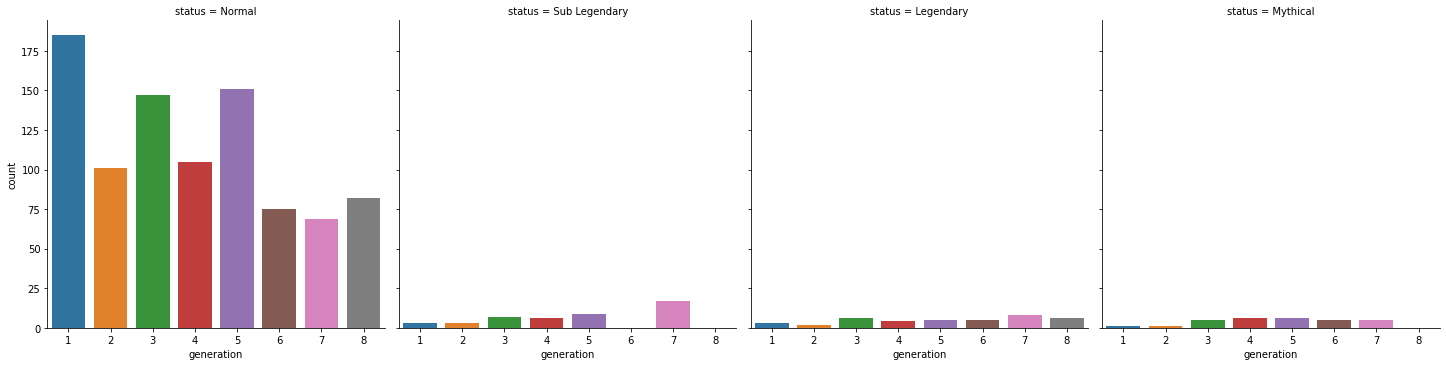

In [ ]:
sns.catplot(x='generation', col='status', kind='count', data=pokedex)

### Pokemones alolan

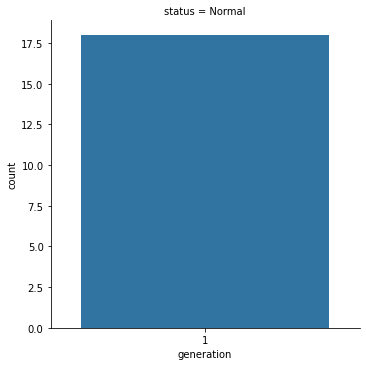

In [ ]:
alolan_pokedex = pokedex[pokedex['name'].apply(lambda x: 'Alolan' in x)]
sns.catplot(x='generation', col='status', kind='count', data=alolan_pokedex)

### Pokemones Galarian

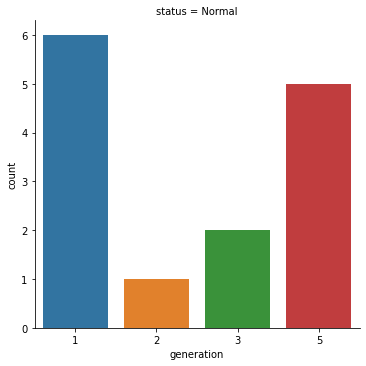

In [ ]:
alolan_pokedex = pokedex[pokedex['name'].apply(lambda x: 'Galarian' in x)]
sns.catplot(x='generation', col='status', kind='count', data=alolan_pokedex)

### Mega evoluciones

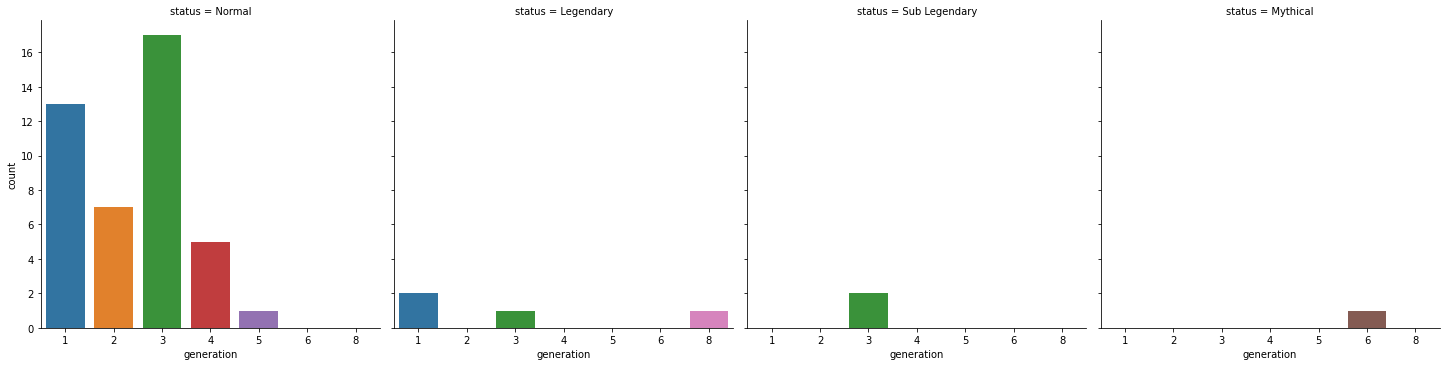

In [ ]:
mega_pokedex1 = pokedex[pokedex['name'].apply(lambda x: 'Mega' in x)]
mega_pokedex2 = pokedex[pokedex['name'].apply(lambda x: 'max' in x)]
mega_pokedex = mega_pokedex1.append(mega_pokedex2)
sns.catplot(x='generation', col='status', kind='count', data=mega_pokedex)

### Total de tipos 1 y 2

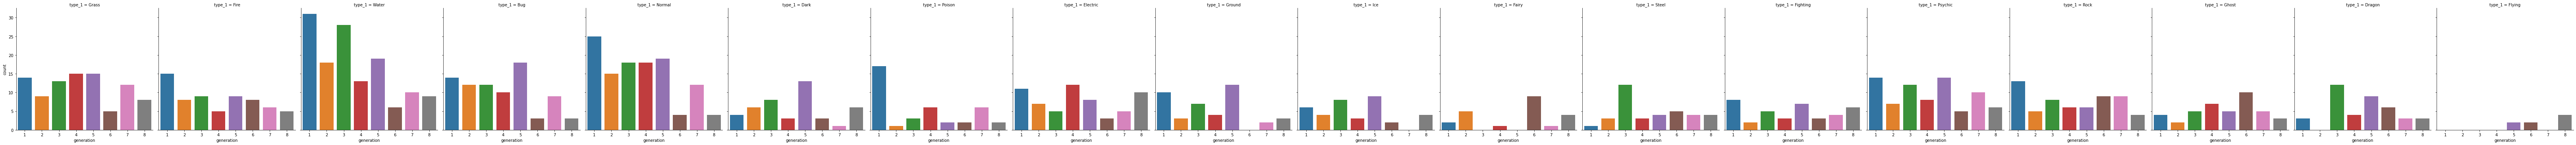

In [ ]:
sns.catplot(x='generation', col='type_1', kind='count', data=pokedex)

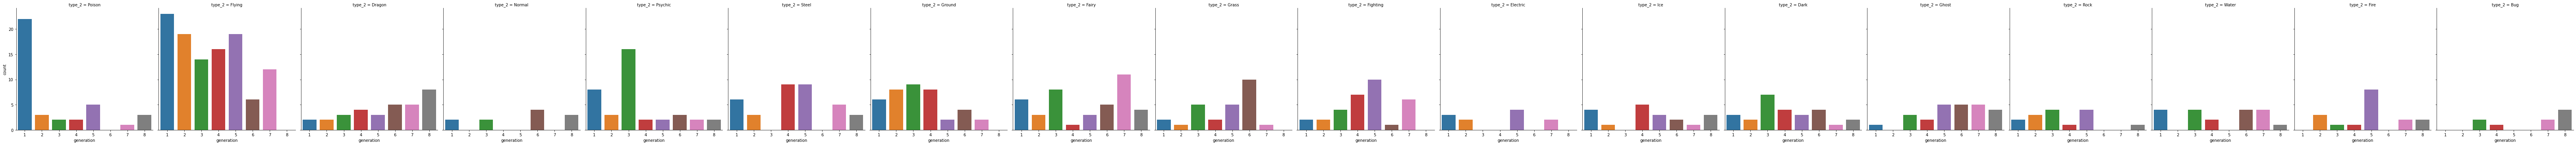

In [ ]:
sns.catplot(x='generation', col='type_2', kind='count', data=pokedex)

## Pokemones con mayor y minimo punto en stat

### General

In [ ]:
def min_max(dataset, column_name):
    max_index = pokedex[column_name].idxmax()
    
    min_index = pokedex[column_name].idxmin()
    
    return max_index, min_index

In [ ]:
def print_max_min(max_pokemon, min_pokemon):
    for i in range(min_pokemon.shape[0]):
        print(f'Pkemkon com max {max_pokemon.iloc[i, 1]}: {max_pokemon.iloc[i, 2]} - {max_pokemon.iloc[i, 0]}')
        print(f'Pokemon con min {min_pokemon.iloc[i, 1]}: {min_pokemon.iloc[i, 2]} - {min_pokemon.iloc[i, 0]}');
        print()

In [ ]:
columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed']
min_dict = {'Name': [], 'Stat': [], 'Value': []}
max_dict = {'Name': [], 'Stat': [], 'Value': []}

for col in columns:
    max_index, min_index = min_max(pokedex, col)
    min_dict['Name'].append(pokedex.loc[min_index, 'name'])
    min_dict['Stat'].append(col)
    min_dict['Value'].append(pokedex.loc[min_index, col])
    max_dict['Name'].append(pokedex.loc[max_index, 'name'])
    max_dict['Stat'].append(col)
    max_dict['Value'].append(pokedex.loc[max_index, col])
    
min_general = pd.DataFrame(min_dict)
max_general = pd.DataFrame(max_dict)

print_max_min(max_general, min_general)

Pkemkon com max attack: 190.0 - Mega Mewtwo X
Pokemon con min attack: 5.0 - Chansey

Pkemkon com max defense: 250.0 - Eternatus Eternamax
Pokemon con min defense: 5.0 - Chansey

Pkemkon com max sp_attack: 194.0 - Mega Mewtwo Y
Pokemon con min sp_attack: 10.0 - Alolan Sandshrew

Pkemkon com max sp_defense: 250.0 - Eternatus Eternamax
Pokemon con min sp_defense: 20.0 - Caterpie

Pkemkon com max hp: 255.0 - Blissey
Pokemon con min hp: 1.0 - Shedinja

Pkemkon com max speed: 180.0 - Deoxys Speed Forme
Pokemon con min speed: 5.0 - Shuckle



### Diferencia de los stat max y min

In [ ]:
general_radar_fig = go.Figure()
general_radar_fig.add_trace(go.Scatterpolar(r=max_general['Value'], theta=max_general['Stat'], fill='toself', name='Max'))
general_radar_fig.add_trace(go.Scatterpolar(r=min_general['Value'], theta=min_general['Stat'], fill='toself', name='Min'))
general_radar_fig.show()

### Stat max y min por generacion

In [ ]:
columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed']
min_dict = {'Name': [], 'Stat': [], 'Value': [], 'Generation': []}
max_dict = {'Name': [], 'Stat': [], 'Value': [], 'Generation': []}

generations = pokedex['generation'].unique()

for i in generations:
    for col in columns:
        max_index, min_index = min_max(pokedex, col)
        min_dict['Name'].append(pokedex.loc[min_index, 'name'])
        min_dict['Stat'].append(col)
        min_dict['Value'].append(pokedex.loc[min_index, col])
        min_dict['Generation'].append(i)
        max_dict['Name'].append(pokedex.loc[max_index, 'name'])
        max_dict['Stat'].append(col)
        max_dict['Value'].append(pokedex.loc[max_index, col])
        max_dict['Generation'].append(i)
        
max_generation = pd.DataFrame(max_dict)
min_generation = pd.DataFrame(min_dict)

for i in generations:
    print(f'Generation {i}')
    print_max_min(max_generation, min_generation)

Generation 1
Pkemkon com max attack: 190.0 - Mega Mewtwo X
Pokemon con min attack: 5.0 - Chansey

Pkemkon com max defense: 250.0 - Eternatus Eternamax
Pokemon con min defense: 5.0 - Chansey

Pkemkon com max sp_attack: 194.0 - Mega Mewtwo Y
Pokemon con min sp_attack: 10.0 - Alolan Sandshrew

Pkemkon com max sp_defense: 250.0 - Eternatus Eternamax
Pokemon con min sp_defense: 20.0 - Caterpie

Pkemkon com max hp: 255.0 - Blissey
Pokemon con min hp: 1.0 - Shedinja

Pkemkon com max speed: 180.0 - Deoxys Speed Forme
Pokemon con min speed: 5.0 - Shuckle

Pkemkon com max attack: 190.0 - Mega Mewtwo X
Pokemon con min attack: 5.0 - Chansey

Pkemkon com max defense: 250.0 - Eternatus Eternamax
Pokemon con min defense: 5.0 - Chansey

Pkemkon com max sp_attack: 194.0 - Mega Mewtwo Y
Pokemon con min sp_attack: 10.0 - Alolan Sandshrew

Pkemkon com max sp_defense: 250.0 - Eternatus Eternamax
Pokemon con min sp_defense: 20.0 - Caterpie

Pkemkon com max hp: 255.0 - Blissey
Pokemon con min hp: 1.0 - Shedi

Pokemon con min speed: 5.0 - Shuckle

Pkemkon com max attack: 190.0 - Mega Mewtwo X
Pokemon con min attack: 5.0 - Chansey

Pkemkon com max defense: 250.0 - Eternatus Eternamax
Pokemon con min defense: 5.0 - Chansey

Pkemkon com max sp_attack: 194.0 - Mega Mewtwo Y
Pokemon con min sp_attack: 10.0 - Alolan Sandshrew

Pkemkon com max sp_defense: 250.0 - Eternatus Eternamax
Pokemon con min sp_defense: 20.0 - Caterpie

Pkemkon com max hp: 255.0 - Blissey
Pokemon con min hp: 1.0 - Shedinja

Pkemkon com max speed: 180.0 - Deoxys Speed Forme
Pokemon con min speed: 5.0 - Shuckle

Pkemkon com max attack: 190.0 - Mega Mewtwo X
Pokemon con min attack: 5.0 - Chansey

Pkemkon com max defense: 250.0 - Eternatus Eternamax
Pokemon con min defense: 5.0 - Chansey

Pkemkon com max sp_attack: 194.0 - Mega Mewtwo Y
Pokemon con min sp_attack: 10.0 - Alolan Sandshrew

Pkemkon com max sp_defense: 250.0 - Eternatus Eternamax
Pokemon con min sp_defense: 20.0 - Caterpie

Pkemkon com max hp: 255.0 - Blissey
Pokemo

### Calcular y sacar el pokemon con el mejor promedio de stat

In [ ]:
columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed']
avg_stat = (pokedex[columns].sum(axis = 1) / len(columns))
max_avg_index = avg_stat.idxmax()

print(f'Pokemon con el stat promedio mas alto: {pokedex.name[max_avg_index]}')

eternamax_df = pokedex.iloc[max_avg_index]
eternamax_df = eternamax_df[columns]
eternamax_df = eternamax_df.T.reset_index()
eternamax_df.columns = ['Stat', 'Value']

eternamax_char = px.line_polar(eternamax_df, r='Value', theta='Stat', line_close=True)
eternamax_char.update_traces(fill='toself')
eternamax_char.show()

Pokemon con el stat promedio mas alto: Eternatus Eternamax


# ML

En este ejercicio vamos a entrenar un ML Supervisado, para que esta pueda predecir si el pokemon es de Estado:
* Normal
* Sub Legendary
* Legendary
* Mythical

In [ ]:
# Cagar la dataset de los pokemones
pokedex = pd.read_csv('./sample_data/pokedex_(Update_05.20).csv').drop('Unnamed: 0', axis = 1)

# El nombre ingles es suficiente, por lo que nombre aleman y japones no son necesarios
columns_to_drop = ['german_name', 'japanese_name']
pokedex = pokedex.drop(columns_to_drop, axis = 1)

# Muestro de la informacion de la dataset
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   generation        1028 non-null   int64  
 3   status            1028 non-null   object 
 4   species           1028 non-null   object 
 5   type_number       1028 non-null   int64  
 6   type_1            1028 non-null   object 
 7   type_2            542 non-null    object 
 8   height_m          1028 non-null   float64
 9   weight_kg         1027 non-null   float64
 10  abilities_number  1028 non-null   int64  
 11  ability_1         1025 non-null   object 
 12  ability_2         513 non-null    object 
 13  ability_hidden    810 non-null    object 
 14  total_points      1028 non-null   float64
 15  hp                1028 non-null   float64
 16  attack            1028 non-null   float64


Aqui descartamos pokemones que nos puede meter ruido en nuestros conjunto de datos, por ejemplo las Megaevoluciones y los pokemones Alolan

In [ ]:
# Seleccionamos Poekmones Mega, max y Alolan
mega_pokemons = pokedex.index[pokedex['name'].apply(lambda x: 'Mega ' in x)].tolist()
dinamax_pokemons = pokedex.index[pokedex['name'].apply(lambda x: 'max' in x)].tolist()
alolan_pokemons = pokedex[pokedex['name'].apply(lambda x: 'Alolan' in x) == True].index.tolist()

# Concatenar
to_delete = np.concatenate((mega_pokemons, dinamax_pokemons, alolan_pokemons))

# Remover
pokedex = pokedex.drop(to_delete, axis=0)

In [ ]:
# Seleccion de columnas que se va a utilizar para el preprocesamiento y en el entrenamiento de la ML
columns_to_pick = ['name', 'status', 'total_points', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

stat_df = pokedex[columns_to_pick]
stat_df

name     status  total_points  attack  \
0                          Bulbasaur     Normal         318.0    49.0   
1                            Ivysaur     Normal         405.0    62.0   
2                           Venusaur     Normal         525.0    82.0   
4                         Charmander     Normal         309.0    52.0   
5                         Charmeleon     Normal         405.0    64.0   
...                              ...        ...           ...     ...   
1022            Zacian Crowned Sword  Legendary         720.0   170.0   
1023     Zacian Hero of Many Battles  Legendary         670.0   130.0   
1024        Zamazenta Crowned Shield  Legendary         720.0   130.0   
1025  Zamazenta Hero of Many Battles  Legendary         670.0   130.0   
1026                       Eternatus  Legendary         690.0    85.0   

      defense  sp_attack  sp_defense  speed  
0        49.0       65.0        65.0   45.0  
1        63.0       80.0        80.0   60.0  
2        83.0      100.0       100.0   80.0  
4        43.0       60.0        50.0   65.0  
5        58.0       80.0        65.0   80.0  
...       ...        ...         ...    ...  
1022    115.0       80.0       115.0  148.0  
1023    115.0       80.0       115.0  138.0  
1024    145.0       80.0       145.0  128.0  
1025    115.0       80.0       115.0  138.0  
1026     95.0      145.0        95.0  130.0  

[961 rows x 8 columns]

Vemos que el total_point tiene una correlacion alta con todos las estadisticas, y esto tiene sentido debido a que el total_point es la suma de todos las estadisticas

In [ ]:
stat_df.corr()

total_points    attack   defense  sp_attack  sp_defense  \
total_points      1.000000  0.723265  0.617355   0.729566    0.699355   
attack            0.723265  1.000000  0.432329   0.362450    0.220732   
defense           0.617355  0.432329  1.000000   0.213934    0.527060   
sp_attack         0.729566  0.362450  0.213934   1.000000    0.498716   
sp_defense        0.699355  0.220732  0.527060   0.498716    1.000000   
speed             0.556779  0.370016  0.003967   0.430386    0.205789   

                 speed  
total_points  0.556779  
attack        0.370016  
defense       0.003967  
sp_attack     0.430386  
sp_defense    0.205789  
speed         1.000000

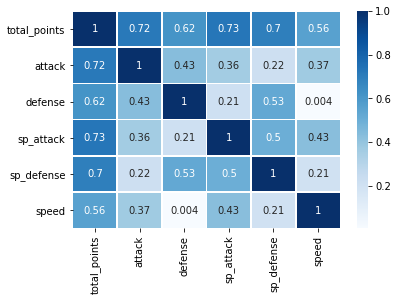

In [ ]:
sns.heatmap(stat_df.corr(), annot=True, linewidths=0.5, cmap="Blues");

Viendo la grafica se puede notar una division clara en la relacion de total_points y los otros estadisticos

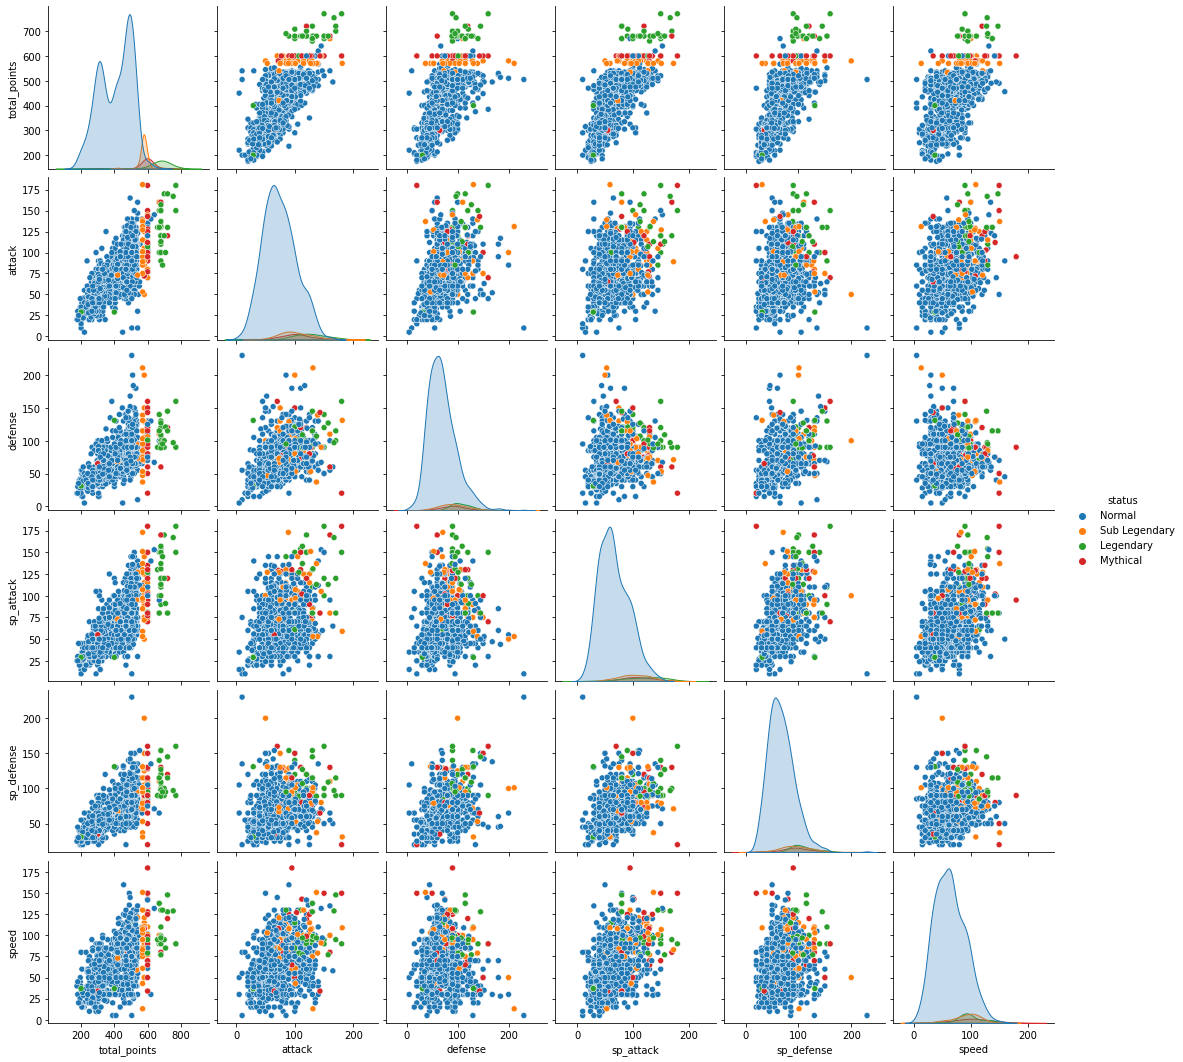

In [ ]:
sns.pairplot(stat_df, hue='status')

In [ ]:
# Mostrar la descripcion del dataset
stat_df.describe()

total_points      attack     defense   sp_attack  sp_defense  \
count    961.000000  961.000000  961.000000  961.000000  961.000000   
mean     428.675338   77.813736   72.723205   71.024974   70.751301   
std      114.978017   30.655778   29.633778   30.737420   27.281586   
min      175.000000    5.000000    5.000000   10.000000   20.000000   
25%      325.000000   55.000000   50.000000   48.000000   50.000000   
50%      450.000000   75.000000   70.000000   65.000000   69.000000   
75%      505.000000  100.000000   90.000000   91.000000   87.000000   
max      770.000000  181.000000  230.000000  180.000000  230.000000   

            speed  
count  961.000000  
mean    67.216441  
std     28.865258  
min      5.000000  
25%     45.000000  
50%     65.000000  
75%     90.000000  
max    180.000000

## Entrenamiento

### Predicion con total_points

In [ ]:
X = stat_df['total_points'].to_frame()
y = stat_df['status']

(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.25)
neighbors_model_t = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

neighbors_model_t.fit(trainX, trainY)
neighbors_model_t.score(X, y)

0.9667013527575442

### Predicion con attack y sp_attack

In [ ]:
X = stat_df[['attack', 'sp_attack']]
y = stat_df['status']

(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.25)
neighbors_model_ap = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

neighbors_model_ap.fit(trainX, trainY)
neighbors_model_ap.score(X, y)

0.9490114464099896

### Predicion con total_points y sp_attack

In [ ]:
X = stat_df[['total_points', 'sp_attack']]
y = stat_df['status']

(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.25)
neighbors_model_ts = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

neighbors_model_ts.fit(trainX, trainY)
neighbors_model_ts.score(X, y)

0.9760665972944849

### Predicion con total_points y attack

In [ ]:
X = stat_df[['total_points', 'attack']]
y = stat_df['status']

(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=3, test_size=0.25)
neighbors_model_ta = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

neighbors_model_ta.fit(trainX, trainY)
neighbors_model_ta.score(X, y)

0.9802289281997919

La puntuacion mas alta fue la combiancion de total_points y attack

## Testing

In [ ]:
# dividimos los pokemones conforme a su estado
normal_pokemons = stat_df[stat_df['status'] == 'Normal']
sub_legendary_pokemon = stat_df[stat_df['status'] == 'Sub Legendary']
legendary_pokemon = stat_df[stat_df['status'] == 'Legendary']
mythical_pokemon = stat_df[stat_df['status'] == 'Mythical']

In [ ]:
X_columns = ['total_points', 'attack']

#### Normal

%: status    0.995322
dtype: float64


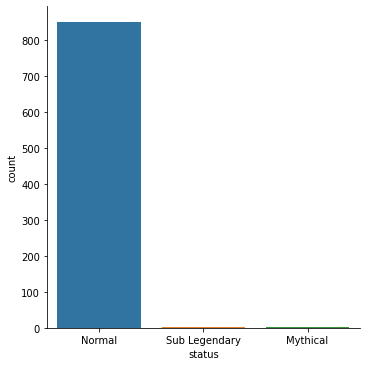

In [ ]:
normal_X = normal_pokemons[X_columns]
normal_y = normal_pokemons['status']

pred_normal_y = neighbors_model_ta.predict(normal_X)
pred_normal_y = pd.DataFrame(pred_normal_y, columns=['status'])
sns.catplot(x='status', kind='count', data=pred_normal_y)
result = pred_normal_y[pred_normal_y['status'] == 'Normal'].count() / normal_y.count()
print(f'%: {result}')

#### Sub Legendary

%: status    0.883721
dtype: float64


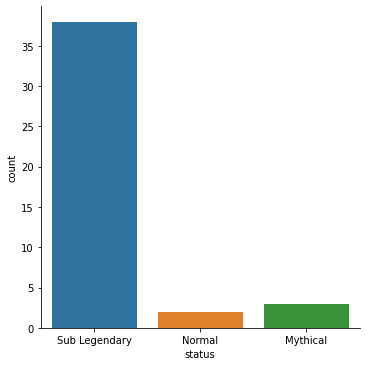

In [ ]:
sub_X = sub_legendary_pokemon[X_columns]
sub_y = sub_legendary_pokemon['status']

pred_sub_y = neighbors_model_ta.predict(sub_X)
pred_sub_y = pd.DataFrame(pred_sub_y, columns=['status'])
sns.catplot(x='status', kind='count', data=pred_sub_y)
result = pred_sub_y[pred_sub_y['status'] == 'Sub Legendary'].count() / sub_y.count()
print(f'%: {result}')

#### Legendary

%: status    0.828571
dtype: float64


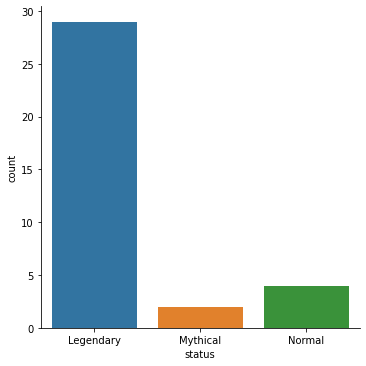

In [ ]:
legend_X = legendary_pokemon[X_columns]
legend_y = legendary_pokemon['status']

pred_legend_y = neighbors_model_ta.predict(legend_X)
pred_legend_y = pd.DataFrame(pred_legend_y, columns=['status'])
sns.catplot(x='status', kind='count', data=pred_legend_y)
result = pred_legend_y[pred_legend_y['status'] == 'Legendary'].count() / legend_y.count()
print(f'%: {result}')

#### Mythical

%: status    0.857143
dtype: float64


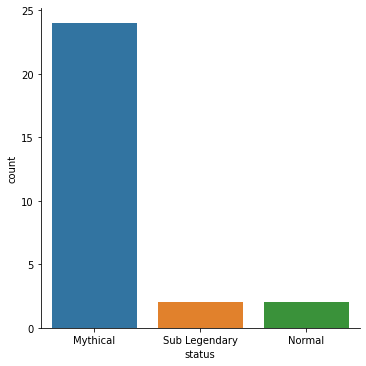

In [ ]:
myth_X = mythical_pokemon[X_columns]
myth_y = mythical_pokemon['status']

pred_myth_y = neighbors_model_ta.predict(myth_X)
pred_myth_y = pd.DataFrame(pred_myth_y, columns=['status'])
sns.catplot(x='status', kind='count', data=pred_myth_y)
result = pred_myth_y[pred_myth_y['status'] == 'Mythical'].count() / myth_y.count()
print(f'%: {result}')